In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import umap
import math

import warnings
warnings.filterwarnings('ignore')

In [98]:
dataset = pd.read_csv('Electricity BILL.csv')
dataset = pd.DataFrame(dataset)
print(dataset.shape)
dataset

(1250, 16)


Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High      174.835708   
1     Under Maintenance                 High      143.086785   
2           Operational               Medium      182.384427   
3                Closed                  Low      226.151493   
4                Closed               Medium      138.292331   
...                 ...                  ...             ...   
1245        Operational                  Low       88.802987   
1246             Closed                  Low      151.704173   
1247  Under Maintenance               Medium      111.501338   
1248        Operational               Medium      161.689296   
1249  Under Maintenance                  Low       72.205218   

      Number_of_R

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1250 non-null   object 
 1   Construction_Year            1250 non-null   int64  
 2   Number_of_Floors             1250 non-null   int64  
 3   Energy_Consumption_Per_SqM   1250 non-null   float64
 4   Water_Usage_Per_Building     1250 non-null   float64
 5   Waste_Recycled_Percentage    1250 non-null   float64
 6   Occupancy_Rate               1250 non-null   float64
 7   Indoor_Air_Quality           1250 non-null   float64
 8   Smart_Devices_Count          1250 non-null   int64  
 9   Green_Certified              1250 non-null   int64  
 10  Maintenance_Resolution_Time  1250 non-null   float64
 11  Building_Status              1250 non-null   object 
 12  Maintenance_Priority         1250 non-null   object 
 13  Energy_Per_SqM    

In [100]:
print(dataset.isnull().sum())

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64


In [101]:
X = dataset.drop(columns=['Electricity_Bill']) 
Y = dataset['Electricity_Bill'] 

In [102]:
X

Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High      174.835708   
1     Under Maintenance                 High      143.086785   
2           Operational               Medium      182.384427   
3                Closed                  Low      226.151493   
4                Closed               Medium      138.292331   
...                 ...                  ...             ...   
1245        Operational                  Low       88.802987   
1246             Closed                  Low      151.704173   
1247  Under Maintenance               Medium      111.501338   
1248        Operational               Medium      161.689296   
1249  Under Maintenance                  Low       72.205218   

      Number_of_R

In [103]:
Y

0       16408.008770
1       15230.425070
2        8117.632795
3       13030.707160
4       25848.853740
            ...     
1245    10955.774250
1246    17280.830640
1247    11618.171220
1248    11732.247650
1249    14301.781790
Name: Electricity_Bill, Length: 1250, dtype: float64

In [104]:
# Split into train and test sets (80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1000, 15) (1000,)
(250, 15) (250,)


<h3 align='center'>Part (a)</h3>

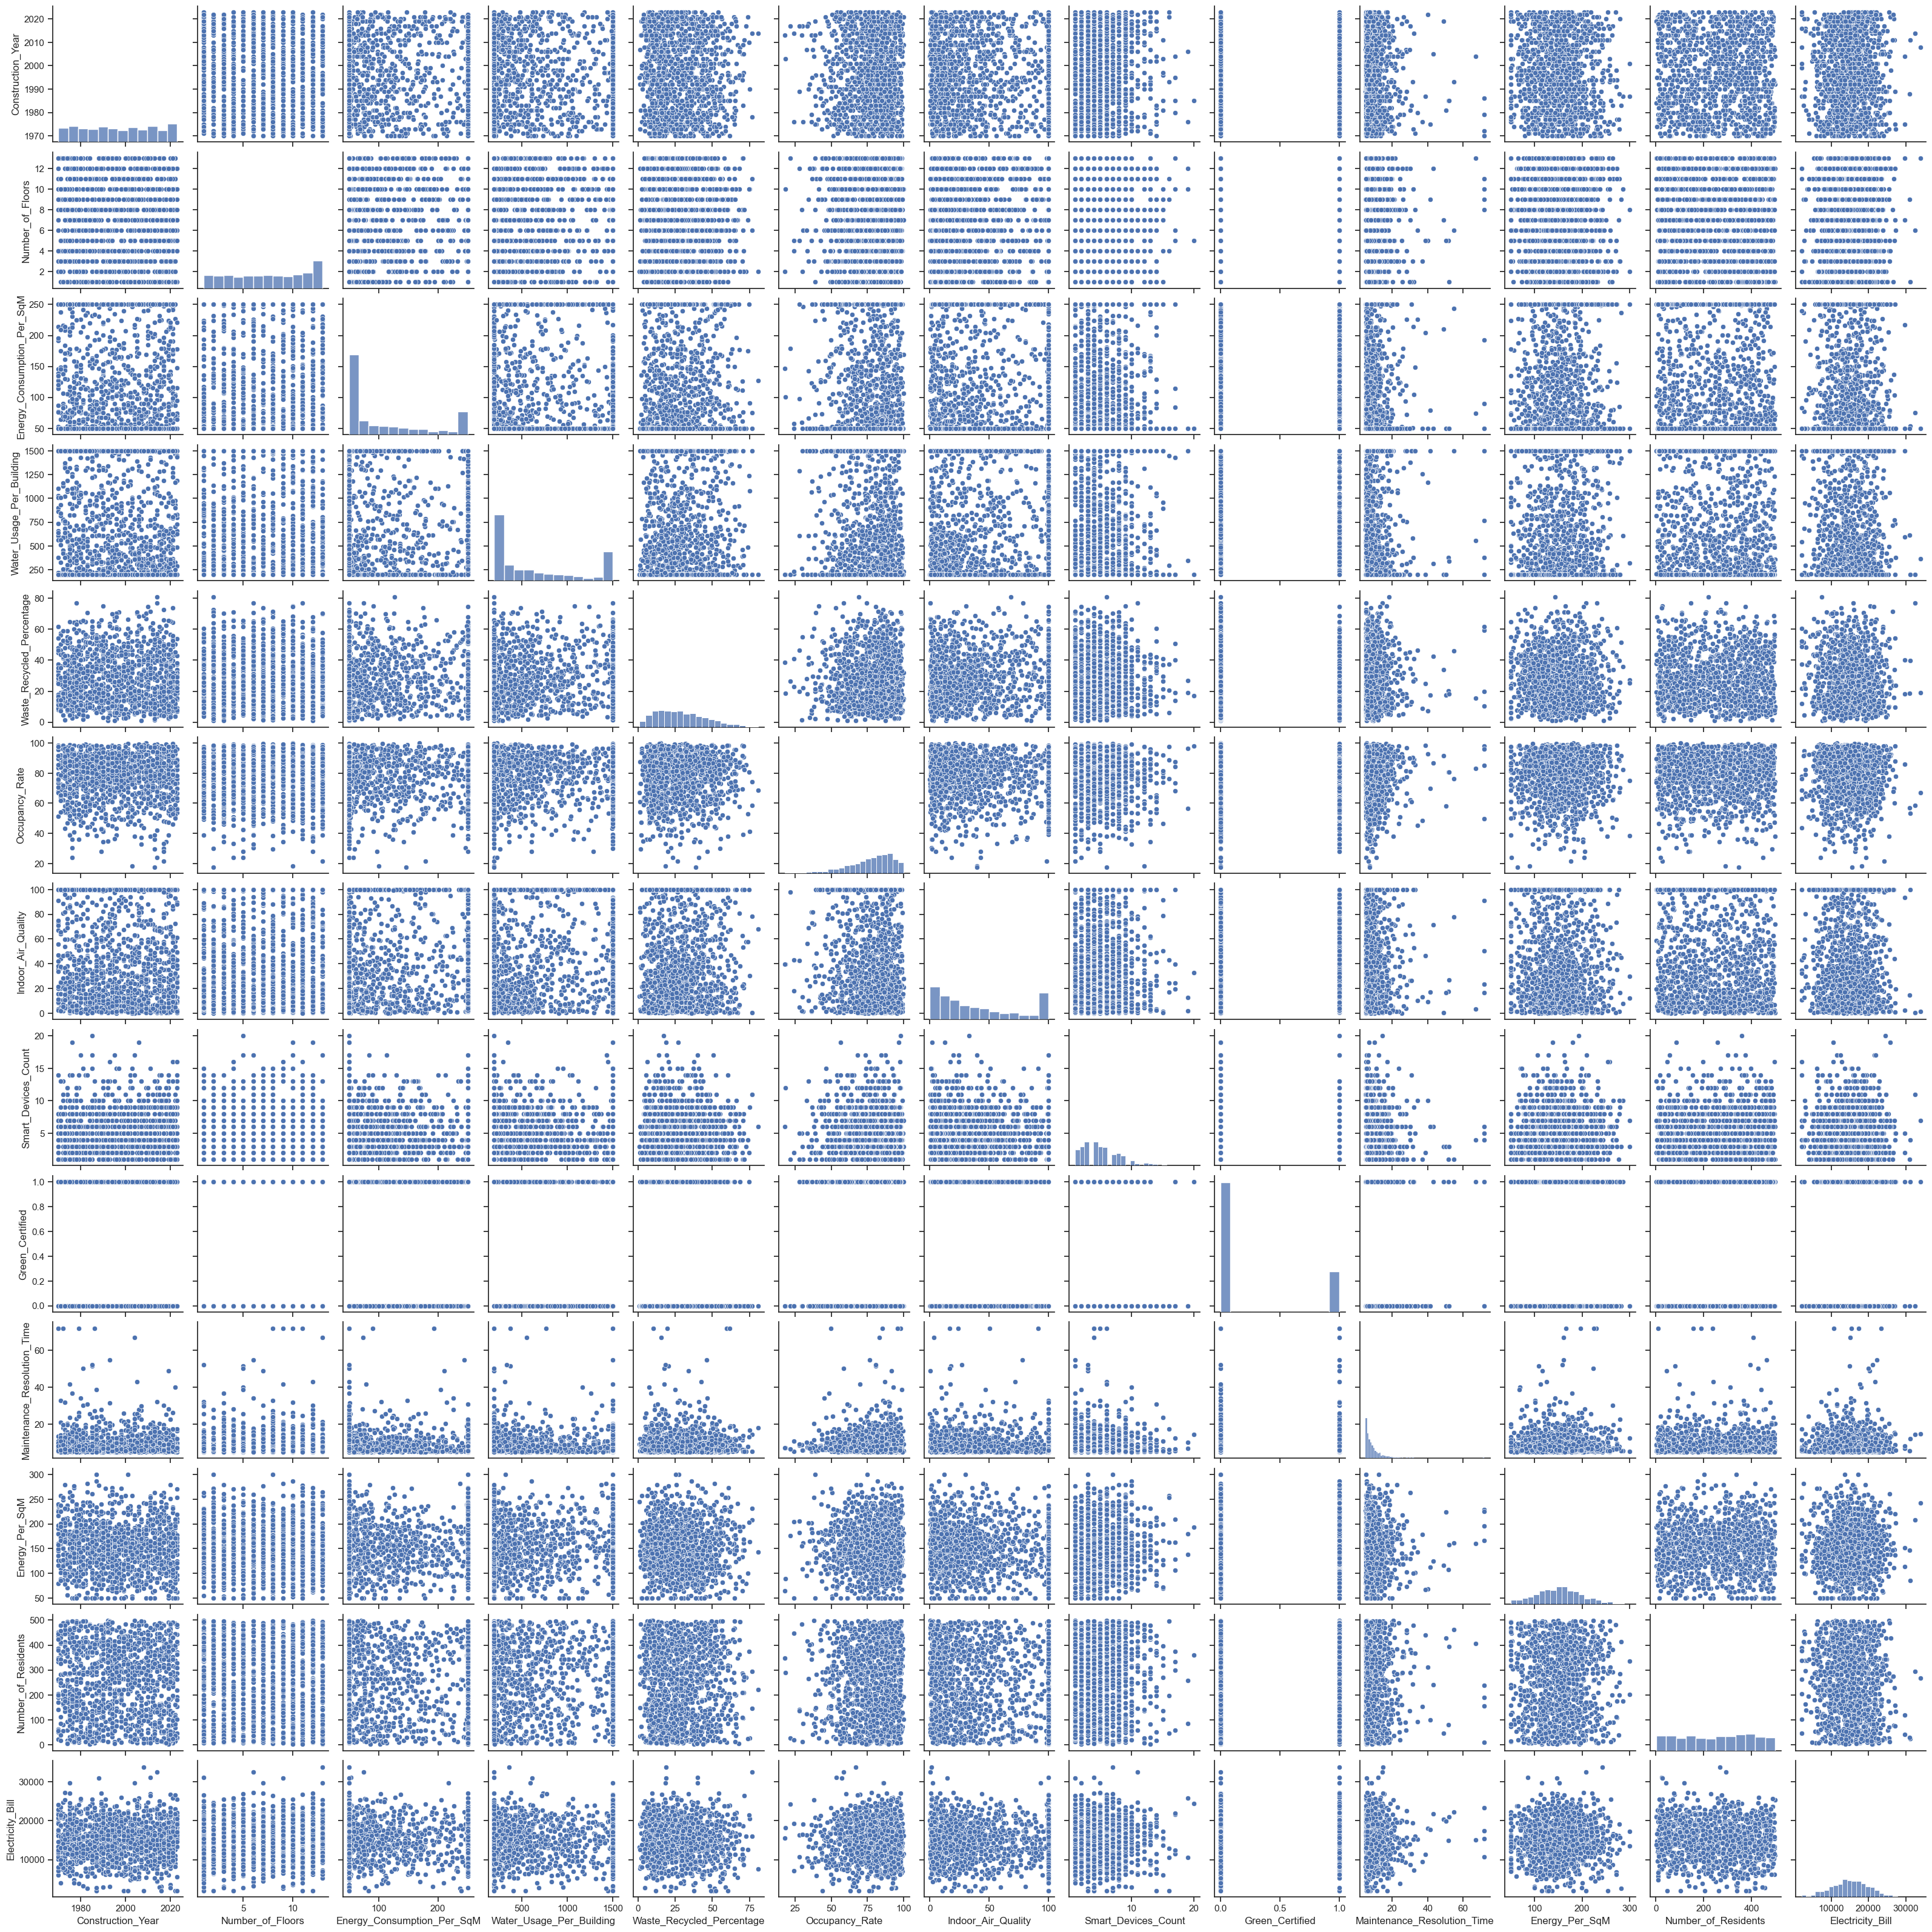

In [105]:
# Pair Plot
sns.pairplot(dataset)
plt.show()

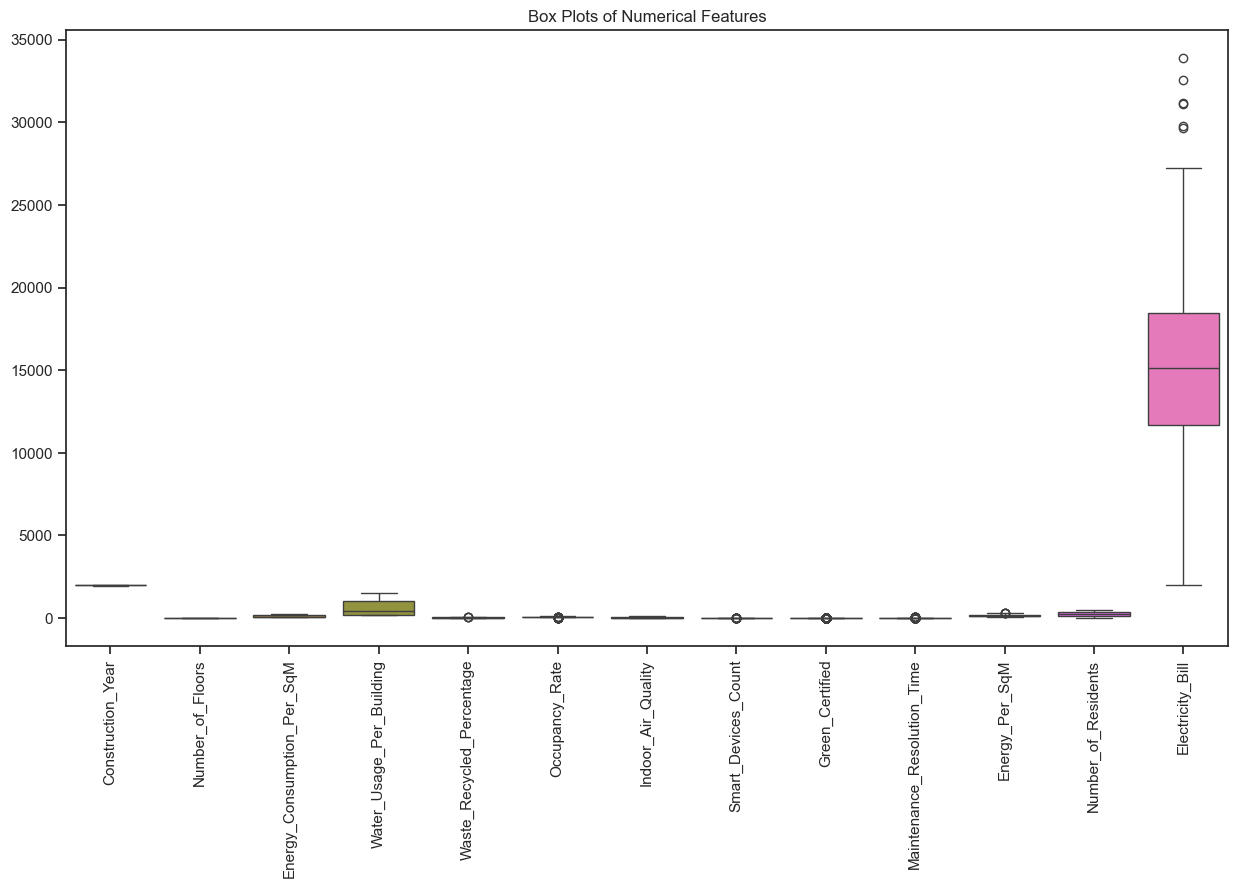

In [106]:
# Box Plots
plt.figure(figsize = (15, 8))
sns.boxplot(data = dataset)
sns.set(style="ticks")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

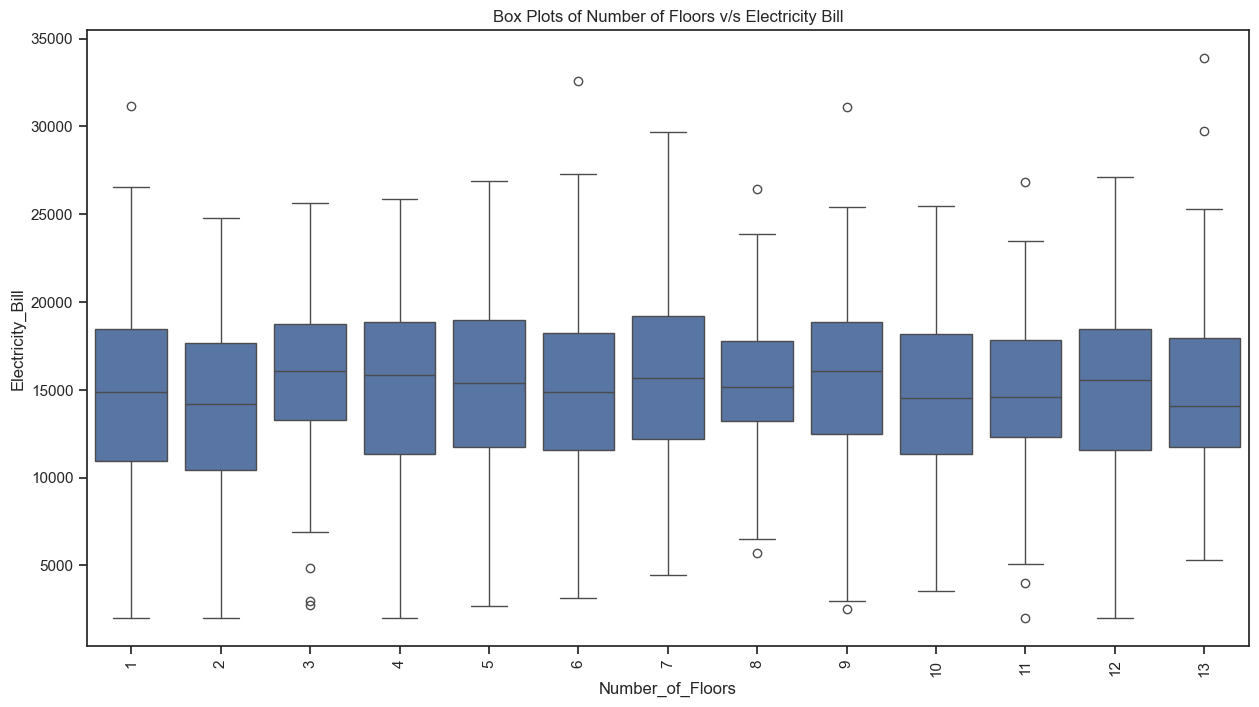

In [107]:
# Box Plots
plt.figure(figsize = (15, 8))
sns.boxplot(data=dataset, x="Number_of_Floors", y="Electricity_Bill")
sns.set(style="ticks")
plt.title('Box Plots of Number of Floors v/s Electricity Bill')
plt.xticks(rotation=90)
plt.show()

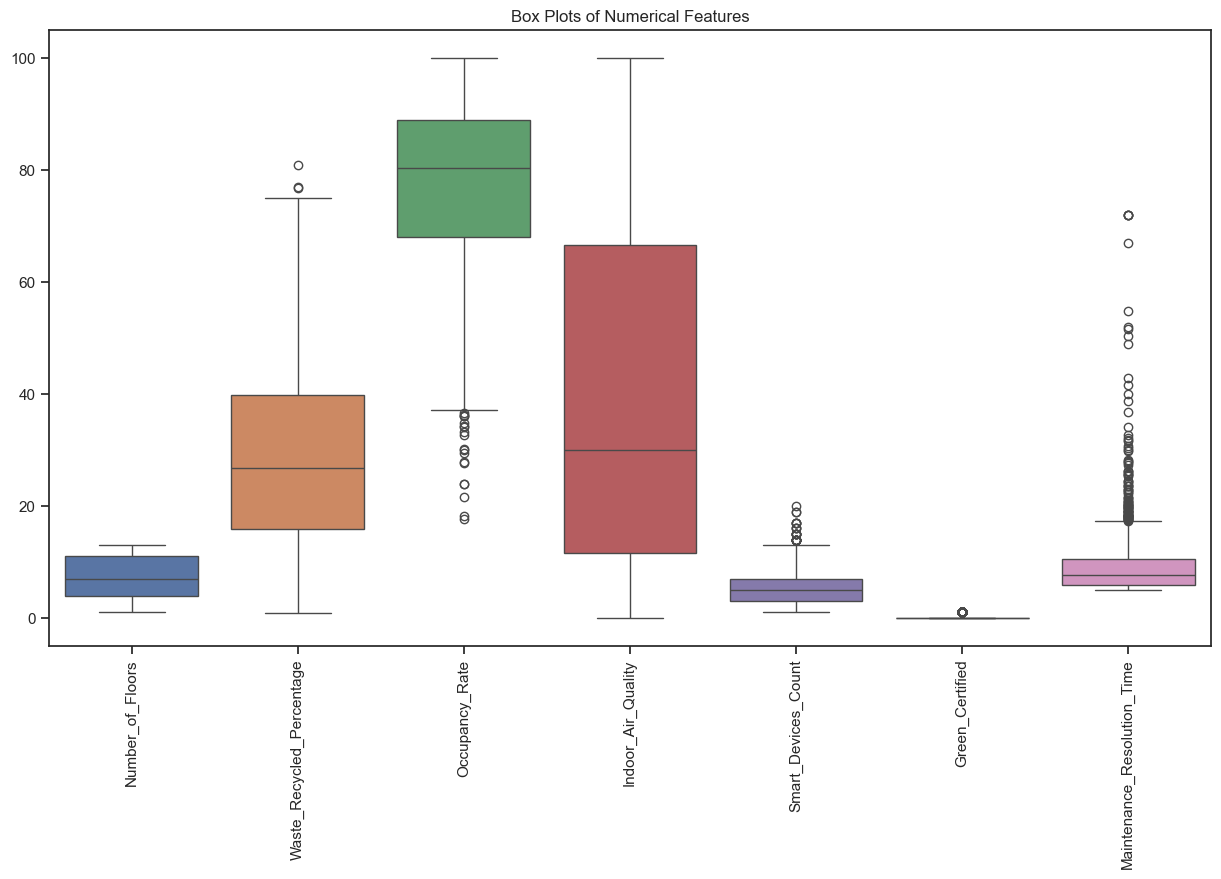

In [108]:
# Box Plots
plt.figure(figsize = (15, 8))
sns.boxplot(data = dataset.drop(columns=['Construction_Year', 'Energy_Consumption_Per_SqM', 'Water_Usage_Per_Building', 'Energy_Per_SqM', 'Number_of_Residents', 'Electricity_Bill']))
sns.set(style="ticks")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

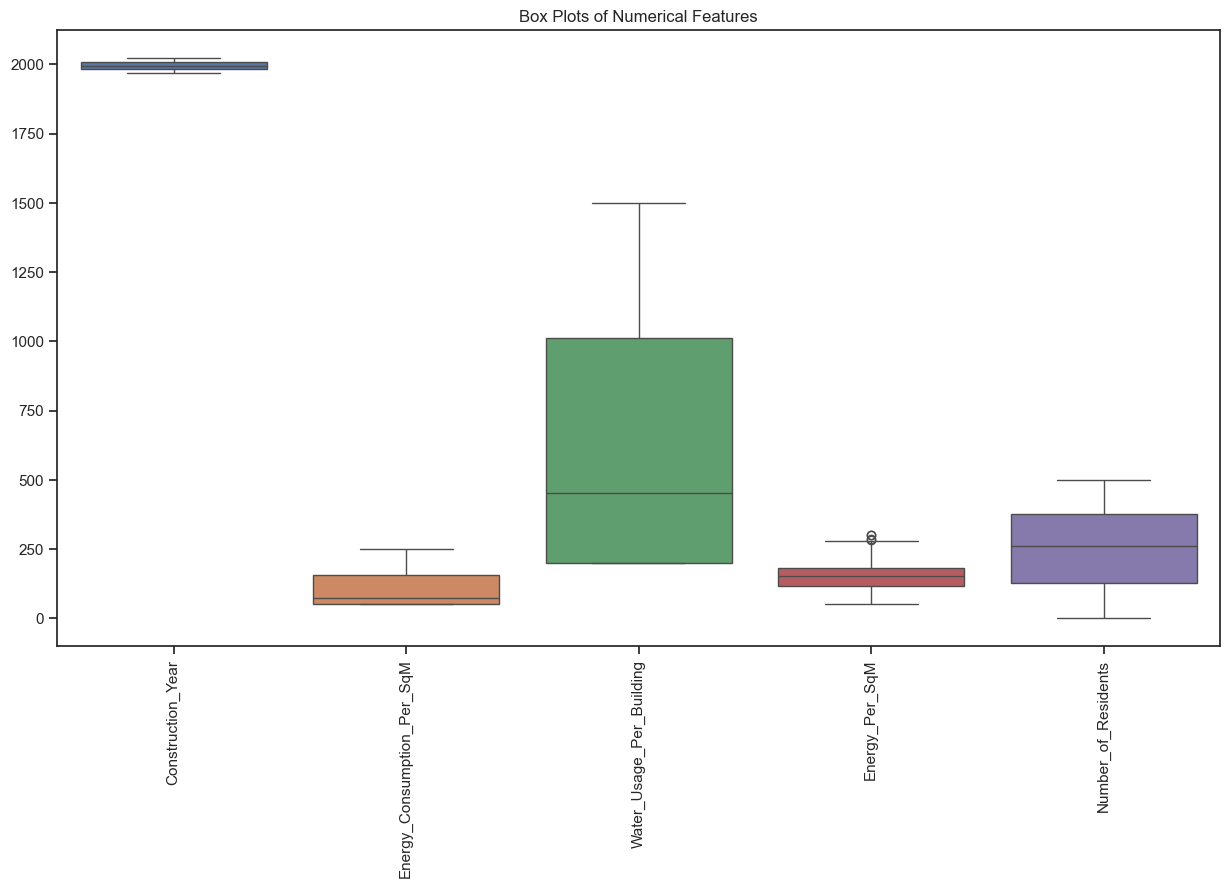

In [109]:
# Box Plots
plt.figure(figsize = (15, 8))
sns.boxplot(data = dataset.drop(columns=['Number_of_Floors', 'Waste_Recycled_Percentage', 'Occupancy_Rate', 'Indoor_Air_Quality', 'Smart_Devices_Count', 'Green_Certified', 'Maintenance_Resolution_Time', 'Electricity_Bill']) )
sns.set(style="ticks")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

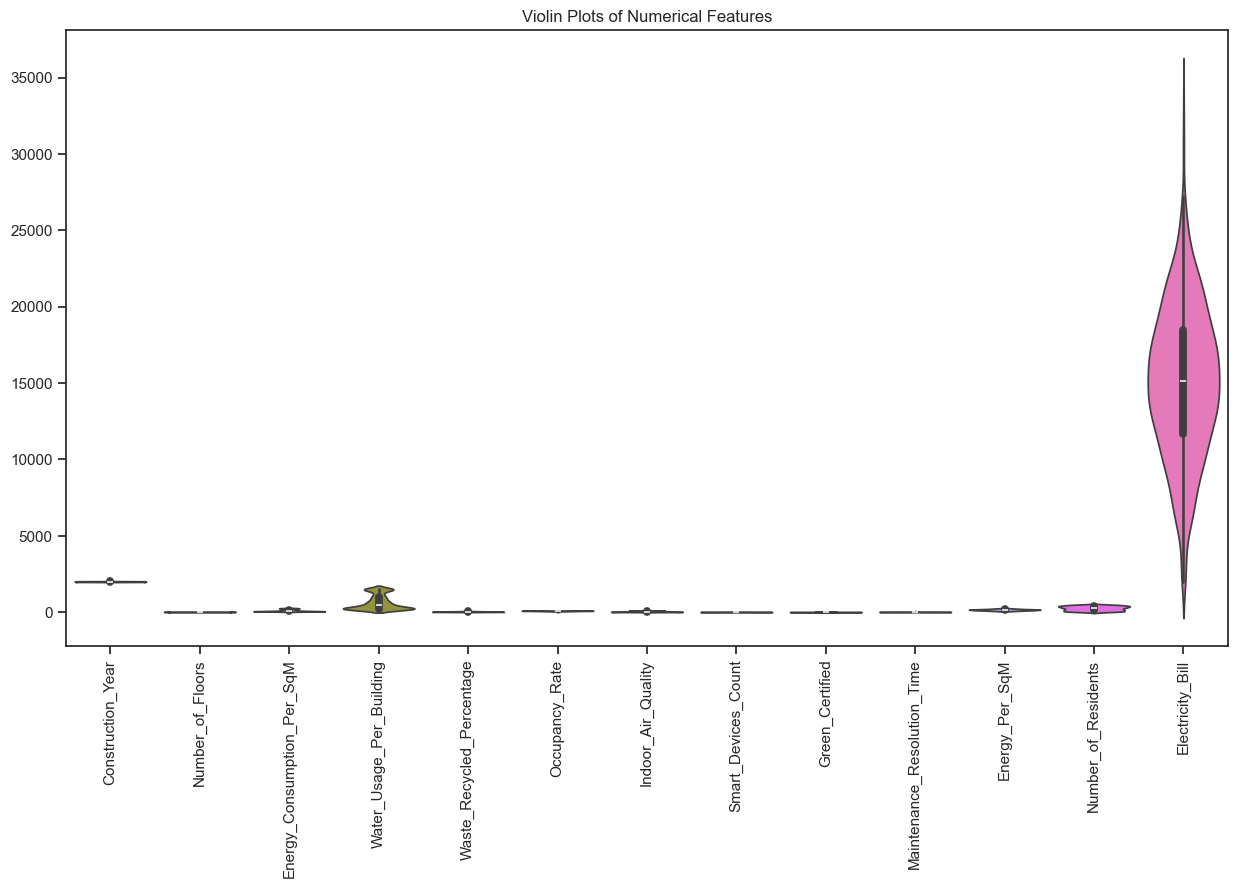

In [110]:
# Violin plots
plt.figure(figsize=(15, 8))
sns.violinplot(data = dataset)
sns.set(style="ticks")
plt.title("Violin Plots of Numerical Features")
plt.xticks(rotation=90)
plt.show()

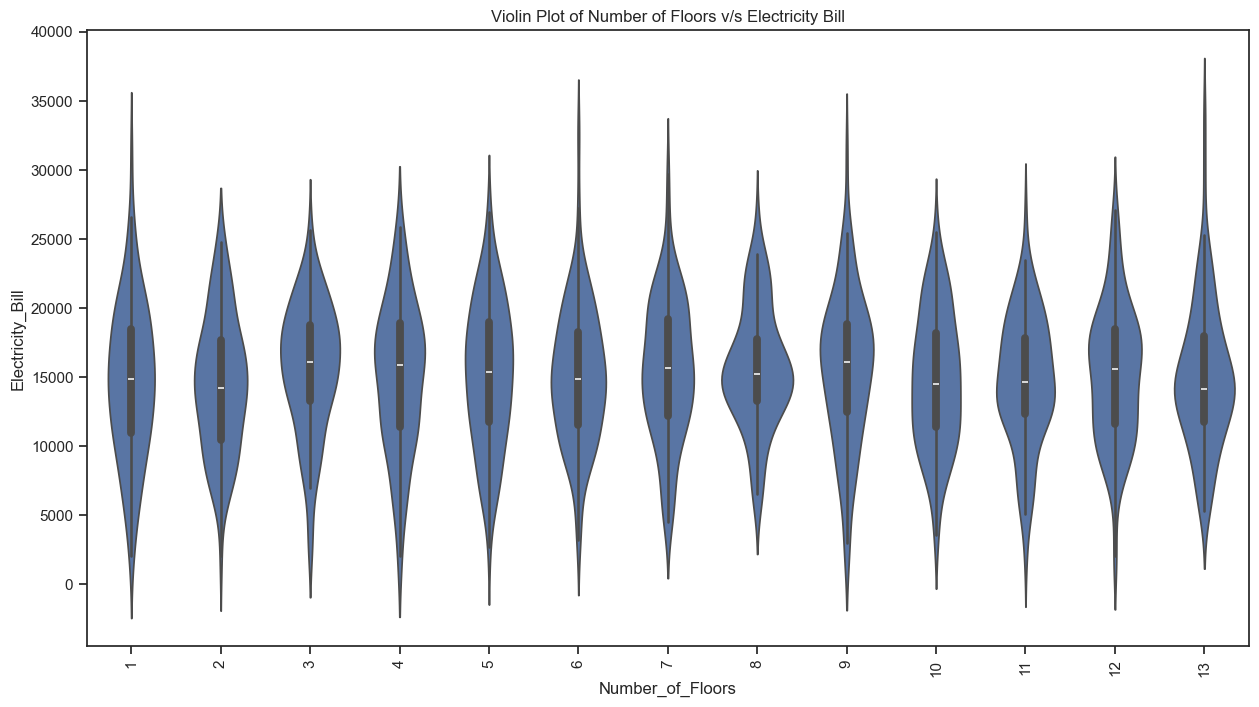

In [111]:
# Violin plots
plt.figure(figsize=(15, 8))
sns.violinplot(data=dataset, x="Number_of_Floors", y="Electricity_Bill")
sns.set(style="ticks")
plt.title("Violin Plot of Number of Floors v/s Electricity Bill")
plt.xticks(rotation=90)
plt.show()

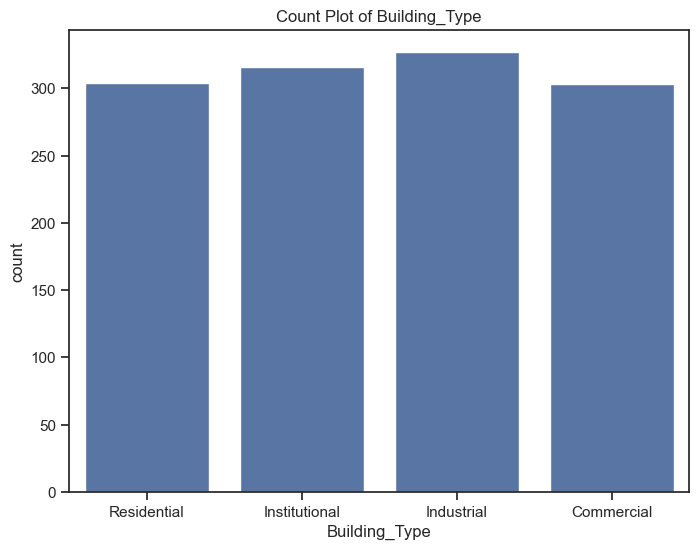

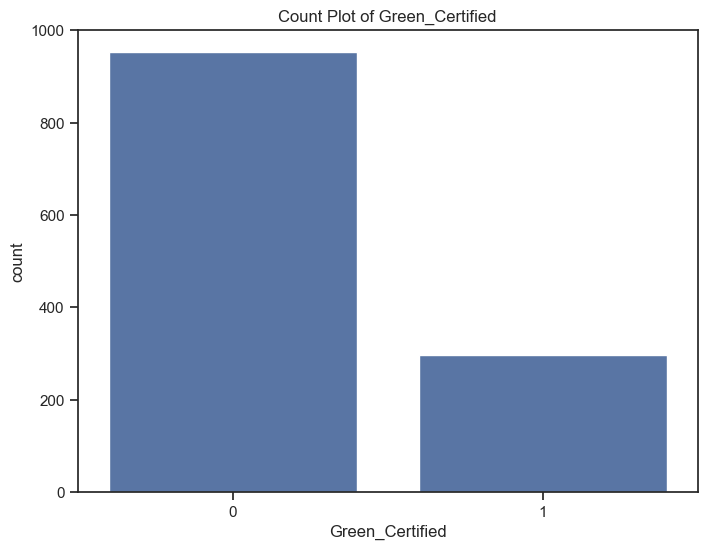

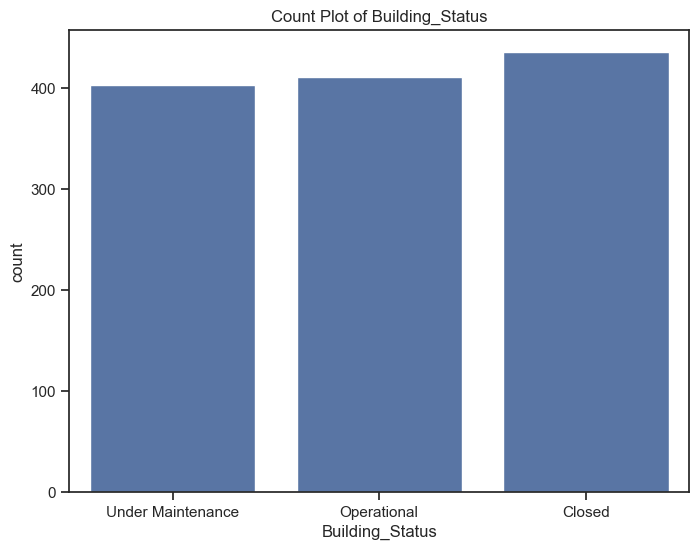

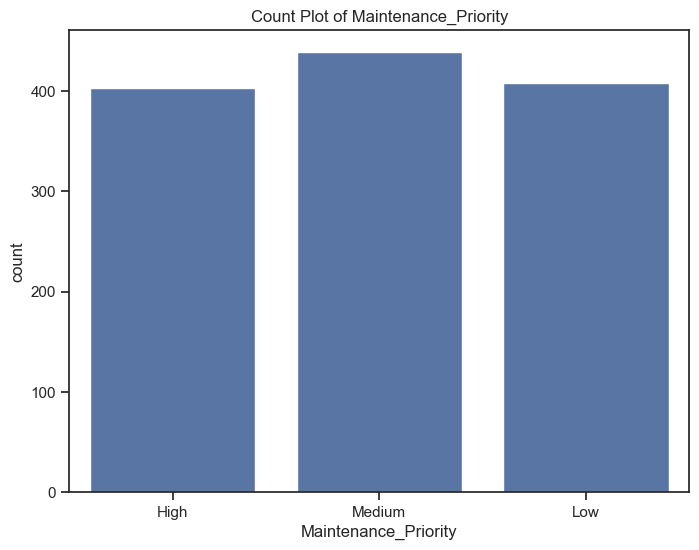

In [112]:
# Count plots for categorical features
categorical_columns = ['Building_Type', 'Green_Certified', 'Building_Status', 'Maintenance_Priority']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=dataset)
    plt.title(f"Count Plot of {col}")
    plt.show()

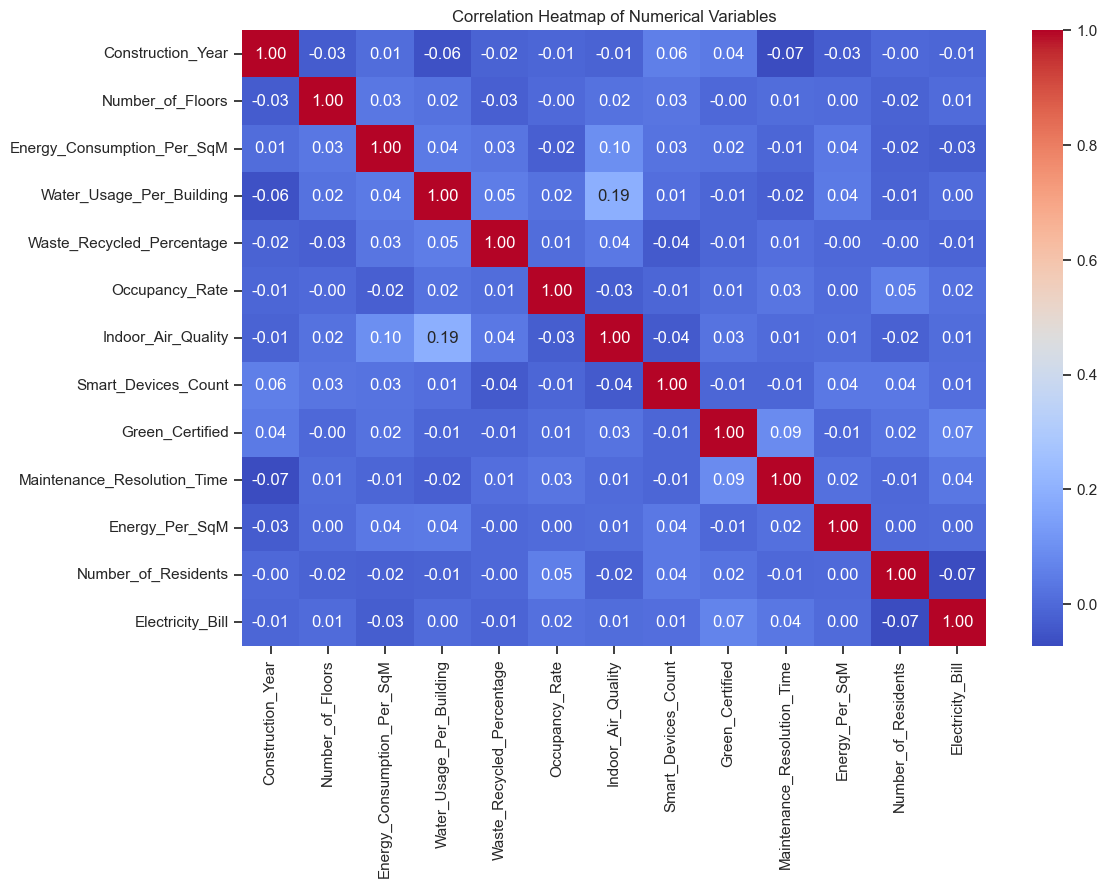

In [113]:
# Correlation heatmap for numerical variables
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


<h3 align='center'>Part (b)</h3>

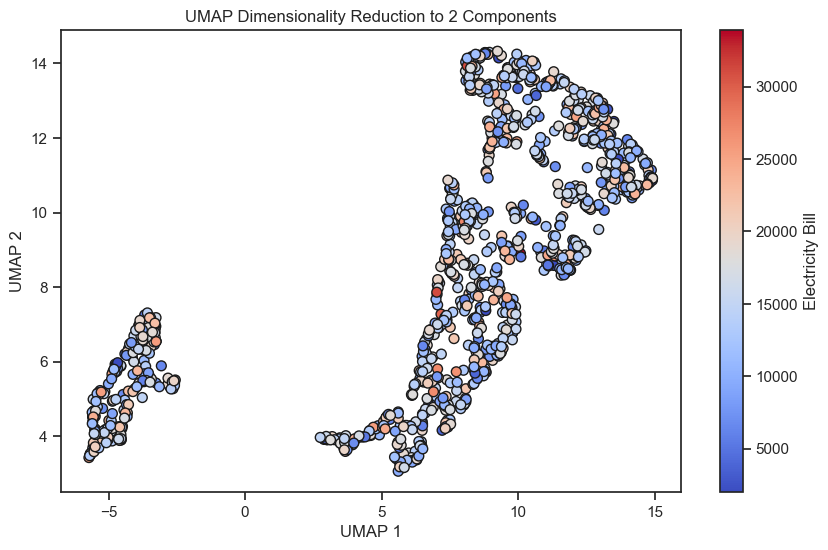

In [114]:
encoded_dataset = dataset.copy()

# Apply label encoding to the categorical columns
categorical_columns = ['Building_Type', 'Building_Status', 'Maintenance_Priority']

label_encoder = LabelEncoder()
for col in categorical_columns:
    encoded_dataset[col] = label_encoder.fit_transform(encoded_dataset[col])

X = encoded_dataset.drop('Electricity_Bill', axis=1)

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=encoded_dataset['Electricity_Bill'], cmap='coolwarm', edgecolor='k', s=50)
plt.colorbar(label='Electricity Bill')
plt.title('UMAP Dimensionality Reduction to 2 Components')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


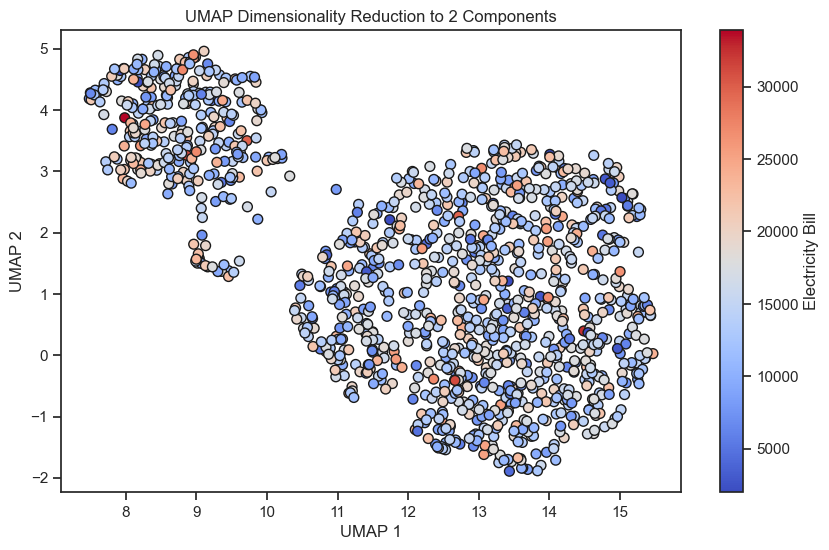

In [115]:
X = encoded_dataset.drop('Electricity_Bill', axis=1)
Y = encoded_dataset['Electricity_Bill']

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=encoded_dataset['Electricity_Bill'], cmap='coolwarm', edgecolor='k', s=50)
plt.colorbar(label='Electricity Bill')
plt.title('UMAP Dimensionality Reduction to 2 Components')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


<h3 align='center'>Part (c)</h3>

In [116]:
def computeMetrics(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    squared_errors = (true-pred)**2
    mse = np.mean(squared_errors)
    absolute_errors = np.abs(true-pred)
    mae = np.mean(absolute_errors)
    mean = np.mean(true)
    squared_dev = np.sum((true-mean)**2)
    r2 = 1 - (np.sum(squared_errors)/squared_dev)
    return mse, mae, r2


In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
m, n = X_train.shape
train_MSE, train_MAE, train_R2 = computeMetrics(Y_train, Y_train_pred)
train_RMSE = math.sqrt(train_MSE)
train_adj_R2 = 1 - (1-train_R2)*(m-1)/(m-n-1)

print("Train MSE: {:.3f}".format(train_MSE))
print("Train RMSE: {:.3f}".format(train_RMSE))
print("Train MAE: {:.3f}".format(train_MAE))
print("Train R2 Score: {:.3f}".format(train_R2))
print("Train Adjusted R2 Score: {:.3f}".format(train_adj_R2))

Y_test_pred = model.predict(X_test)
m, n = X_test.shape
test_MSE, test_MAE, test_R2 = computeMetrics(Y_test, Y_test_pred)
test_RMSE = math.sqrt(test_MSE)
test_adj_R2 = 1 - (1-test_R2)*(m-1)/(m-n-1)

print("Test MSE: {:.3f}".format(test_MSE))
print("Test RMSE: {:.3f}".format(test_RMSE))
print("Test MAE: {:.3f}".format(test_MAE))
print("Test R2 Score: {:.3f}".format(test_R2))
print("Test Adjusted R2 Score: {:.3f}".format(test_adj_R2))


Train MSE: 24475013.168
Train RMSE: 4947.223
Train MAE: 4006.328
Train R2 Score: 0.014
Train Adjusted R2 Score: -0.001
Test MSE: 24278016.156
Test RMSE: 4927.273
Test MAE: 3842.409
Test R2 Score: 0.000
Test Adjusted R2 Score: -0.064


<h3 align='center'>Part (d)</h3>

Referred : https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after

In [118]:
# Without Scaling
X = encoded_dataset.drop('Electricity_Bill', axis=1)
Y = encoded_dataset['Electricity_Bill']

X = X.to_numpy()
Y = Y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)

selected_features = np.array(encoded_dataset.drop('Electricity_Bill', axis=1).columns)[rfe.support_]
print(f"Selected Features: {selected_features}")

# Train the model with selected features
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]
model.fit(X_train_selected, y_train)

Y_train_pred = model.predict(X_train_selected)
m, n = X_train_selected.shape
train_MSE, train_MAE, train_R2 = computeMetrics(Y_train, Y_train_pred)
train_RMSE = math.sqrt(train_MSE)
train_adj_R2 = 1 - (1-train_R2)*(m-1)/(m-n-1)

print("Train MSE: {:.3f}".format(train_MSE))
print("Train RMSE: {:.3f}".format(train_RMSE))
print("Train MAE: {:.3f}".format(train_MAE))
print("Train R2 Score: {:.3f}".format(train_R2))
print("Train Adjusted R2 Score: {:.3f}".format(train_adj_R2))

y_test_pred = model.predict(X_test_selected)
Y_test_pred = model.predict(X_test_selected)
m, n = X_test_selected.shape
test_MSE, test_MAE, test_R2 = computeMetrics(Y_test, Y_test_pred)
test_RMSE = math.sqrt(test_MSE)
test_adj_R2 = 1 - (1-test_R2)*(m-1)/(m-n-1)

print("Test MSE: {:.3f}".format(test_MSE))
print("Test RMSE: {:.3f}".format(test_RMSE))
print("Test MAE: {:.3f}".format(test_MAE))
print("Test R2 Score: {:.3f}".format(test_R2))
print("Test Adjusted R2 Score: {:.3f}".format(test_adj_R2))


Selected Features: ['Building_Type' 'Green_Certified' 'Building_Status']
Train MSE: 24673540.312
Train RMSE: 4967.247
Train MAE: 4006.784
Train R2 Score: 0.006
Train Adjusted R2 Score: 0.003
Test MSE: 24181190.647
Test RMSE: 4917.437
Test MAE: 3825.652
Test R2 Score: 0.004
Test Adjusted R2 Score: -0.008


In [119]:
# With Scaling

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)

selected_features = np.array(encoded_dataset.drop('Electricity_Bill', axis=1).columns)[rfe.support_]
print(f"Selected Features: {selected_features}")

# Train the model with selected features
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]
model.fit(X_train_selected, y_train)

Y_train_pred = model.predict(X_train_selected)
m, n = X_train_selected.shape
train_MSE, train_MAE, train_R2 = computeMetrics(Y_train, Y_train_pred)
train_RMSE = math.sqrt(train_MSE)
train_adj_R2 = 1 - (1-train_R2)*(m-1)/(m-n-1)

print("Train MSE: {:.3f}".format(train_MSE))
print("Train RMSE: {:.3f}".format(train_RMSE))
print("Train MAE: {:.3f}".format(train_MAE))
print("Train R2 Score: {:.3f}".format(train_R2))
print("Train Adjusted R2 Score: {:.3f}".format(train_adj_R2))

y_test_pred = model.predict(X_test_selected)
Y_test_pred = model.predict(X_test_selected)
m, n = X_test_selected.shape
test_MSE, test_MAE, test_R2 = computeMetrics(Y_test, Y_test_pred)
test_RMSE = math.sqrt(test_MSE)
test_adj_R2 = 1 - (1-test_R2)*(m-1)/(m-n-1)

print("Test MSE: {:.3f}".format(test_MSE))
print("Test RMSE: {:.3f}".format(test_RMSE))
print("Test MAE: {:.3f}".format(test_MAE))
print("Test R2 Score: {:.3f}".format(test_R2))
print("Test Adjusted R2 Score: {:.3f}".format(test_adj_R2))


Selected Features: ['Building_Type' 'Green_Certified' 'Number_of_Residents']
Train MSE: 24569032.907
Train RMSE: 4956.716
Train MAE: 4006.473
Train R2 Score: 0.010
Train Adjusted R2 Score: 0.007
Test MSE: 23941409.063
Test RMSE: 4892.996
Test MAE: 3813.948
Test R2 Score: 0.014
Test Adjusted R2 Score: 0.002


<h3 align='center'>Part (e)</h3>

In [120]:
X = dataset.drop('Electricity_Bill', axis=1)
Y = dataset['Electricity_Bill']

categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(X[categorical_features])

encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
X_encoded = pd.concat([X.drop(categorical_features, axis=1), encoded_categorical_df], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

model = Ridge()
model.fit(X_train, y_train)

Y_train_pred = model.predict(X_train)
m, n = X_train.shape
train_MSE, train_MAE, train_R2 = computeMetrics(Y_train, Y_train_pred)
train_RMSE = math.sqrt(train_MSE)
train_adj_R2 = 1 - (1-train_R2)*(m-1)/(m-n-1)

print("Train MSE: {:.3f}".format(train_MSE))
print("Train RMSE: {:.3f}".format(train_RMSE))
print("Train MAE: {:.3f}".format(train_MAE))
print("Train R2 Score: {:.3f}".format(train_R2))
print("Train Adjusted R2 Score: {:.3f}".format(train_adj_R2))

Y_test_pred = model.predict(X_test)
m, n = X_test.shape
test_MSE, test_MAE, test_R2 = computeMetrics(Y_test, Y_test_pred)
test_RMSE = math.sqrt(test_MSE)
test_adj_R2 = 1 - (1-test_R2)*(m-1)/(m-n-1)

print("Test MSE: {:.3f}".format(test_MSE))
print("Test RMSE: {:.3f}".format(test_RMSE))
print("Test MAE: {:.3f}".format(test_MAE))
print("Test R2 Score: {:.3f}".format(test_R2))
print("Test Adjusted R2 Score: {:.3f}".format(test_adj_R2))


Train MSE: 24188936.715
Train RMSE: 4918.225
Train MAE: 3976.694
Train R2 Score: 0.025
Train Adjusted R2 Score: 0.007
Test MSE: 24129257.316
Test RMSE: 4912.154
Test MAE: 3797.612
Test R2 Score: 0.006
Test Adjusted R2 Score: -0.076


<h3 align='center'>Part (f)</h3>

In [121]:
components = [4, 5, 6, 8]

for c in components:
    ica = FastICA(n_components=c, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)
    
    model = Ridge()
    model.fit(X_train_ica, y_train)
    
    print(f"\nResults for {c} Components:")
    
    Y_train_pred = model.predict(X_train_ica)
    m, n = X_train_ica.shape
    train_MSE, train_MAE, train_R2 = computeMetrics(Y_train, Y_train_pred)
    train_RMSE = math.sqrt(train_MSE)
    train_adj_R2 = 1 - (1-train_R2)*(m-1)/(m-n-1)

    print("Train MSE: {:.3f}".format(train_MSE))
    print("Train RMSE: {:.3f}".format(train_RMSE))
    print("Train MAE: {:.3f}".format(train_MAE))
    print("Train R2 Score: {:.3f}".format(train_R2))
    print("Train Adjusted R2 Score: {:.3f}".format(train_adj_R2))

    Y_test_pred = model.predict(X_test_ica)
    m, n = X_test_ica.shape
    test_MSE, test_MAE, test_R2 = computeMetrics(Y_test, Y_test_pred)
    test_RMSE = math.sqrt(test_MSE)
    test_adj_R2 = 1 - (1-test_R2)*(m-1)/(m-n-1)

    print("Test MSE: {:.3f}".format(test_MSE))
    print("Test RMSE: {:.3f}".format(test_RMSE))
    print("Test MAE: {:.3f}".format(test_MAE))
    print("Test R2 Score: {:.3f}".format(test_R2))
    print("Test Adjusted R2 Score: {:.3f}".format(test_adj_R2))



Results for 4 Components:
Train MSE: 24701058.762
Train RMSE: 4970.016
Train MAE: 4010.984
Train R2 Score: 0.005
Train Adjusted R2 Score: 0.001
Test MSE: 24167219.342
Test RMSE: 4916.017
Test MAE: 3818.894
Test R2 Score: 0.005
Test Adjusted R2 Score: -0.012

Results for 5 Components:
Train MSE: 24683781.380
Train RMSE: 4968.278
Train MAE: 4008.436
Train R2 Score: 0.006
Train Adjusted R2 Score: 0.001
Test MSE: 24261490.341
Test RMSE: 4925.595
Test MAE: 3831.495
Test R2 Score: 0.001
Test Adjusted R2 Score: -0.020

Results for 6 Components:
Train MSE: 24682728.731
Train RMSE: 4968.172
Train MAE: 4009.399
Train R2 Score: 0.006
Train Adjusted R2 Score: -0.000
Test MSE: 24253810.365
Test RMSE: 4924.816
Test MAE: 3829.859
Test R2 Score: 0.001
Test Adjusted R2 Score: -0.024

Results for 8 Components:
Train MSE: 24674426.131
Train RMSE: 4967.336
Train MAE: 4009.038
Train R2 Score: 0.006
Train Adjusted R2 Score: -0.002
Test MSE: 24222147.565
Test RMSE: 4921.600
Test MAE: 3830.143
Test R2 Score:

<h3 align='center'>Part (g)</h3>

In [122]:
# X_scaled of part (c)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
alphas = [0.05, 0.1, 5, 10]

for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, random_state=42)

    elastic_net.fit(X_train, y_train)

    Y_test_pred = elastic_net.predict(X_test)
    m, n = X_test.shape
    test_MSE, test_MAE, test_R2 = computeMetrics(Y_test, Y_test_pred)
    test_RMSE = math.sqrt(test_MSE)
    test_adj_R2 = 1 - (1-test_R2)*(m-1)/(m-n-1)

    print(f"\nResults for alpha={alpha}:")

    print("Test MSE: {:.3f}".format(test_MSE))
    print("Test RMSE: {:.3f}".format(test_RMSE))
    print("Test MAE: {:.3f}".format(test_MAE))
    print("Test R2 Score: {:.3f}".format(test_R2))
    print("Test Adjusted R2 Score: {:.3f}".format(test_adj_R2))


Results for alpha=0.05:
Test MSE: 24272612.870
Test RMSE: 4926.724
Test MAE: 3841.703
Test R2 Score: 0.000
Test Adjusted R2 Score: -0.064

Results for alpha=0.1:
Test MSE: 24267836.217
Test RMSE: 4926.240
Test MAE: 3841.133
Test R2 Score: 0.000
Test Adjusted R2 Score: -0.064

Results for alpha=5:
Test MSE: 24277056.627
Test RMSE: 4927.175
Test MAE: 3834.644
Test R2 Score: 0.000
Test Adjusted R2 Score: -0.064

Results for alpha=10:
Test MSE: 24307831.389
Test RMSE: 4930.297
Test MAE: 3837.645
Test R2 Score: -0.001
Test Adjusted R2 Score: -0.065


<h3 align='center'>Part (h)</h3>

In [123]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

Y_train_pred = gbr.predict(X_train)
m, n = X_train.shape
train_MSE, train_MAE, train_R2 = computeMetrics(Y_train, Y_train_pred)
train_RMSE = math.sqrt(train_MSE)
train_adj_R2 = 1 - (1-train_R2)*(m-1)/(m-n-1)

print("Train MSE: {:.3f}".format(train_MSE))
print("Train RMSE: {:.3f}".format(train_RMSE))
print("Train MAE: {:.3f}".format(train_MAE))
print("Train R2 Score: {:.3f}".format(train_R2))
print("Train Adjusted R2 Score: {:.3f}".format(train_adj_R2))

Y_test_pred = gbr.predict(X_test)
m, n = X_test.shape
test_MSE, test_MAE, test_R2 = computeMetrics(Y_test, Y_test_pred)
test_RMSE = math.sqrt(test_MSE)
test_adj_R2 = 1 - (1-test_R2)*(m-1)/(m-n-1)

print("Test MSE: {:.3f}".format(test_MSE))
print("Test RMSE: {:.3f}".format(test_RMSE))
print("Test MAE: {:.3f}".format(test_MAE))
print("Test R2 Score: {:.3f}".format(test_R2))
print("Test Adjusted R2 Score: {:.3f}".format(test_adj_R2))

Train MSE: 14926446.257
Train RMSE: 3863.476
Train MAE: 3092.748
Train R2 Score: 0.399
Train Adjusted R2 Score: 0.389
Test MSE: 24392500.901
Test RMSE: 4938.876
Test MAE: 3815.703
Test R2 Score: -0.005
Test Adjusted R2 Score: -0.069
